<div>
<h1 style="background-color:#E9CAA6;padding:20px;border-radius:10px;border:3px solid #D59701;color:#1a6975;text-align:center" >📊CHAT BOT ｜Exploratory analysis of chat-bot data</h1>
</div>

# Table of Contents
<a id="toc"></a>
- [1. Import and Reading](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Reading Data](#1.2)
- [2. Exploratory analysis of  data](#2)
    - [2.1 Basic information of data](#2.1)
    - [2.2 Creating sentences from list](#2.2)
    - [2.3 Splitting data into Story, Questions and Answers](#2.3)
- [3. Data Preprocessing and Model Designing](#3)
    - [3.1 Dividing a large quantity of text into smaller fragments](#3.1)
    - [3.2 Sequential Model Design and Model training](#3.2)
    - [3.3 Modle Testing](#3.3)

<a id="1"></a>

<div>
<h1 style="background-color:#FFDDC3;padding:18px;border-radius:10px;border:3px solid #E77F2A;color:#053610;text-align:center" >Import and Reading</h1>
</div>


<a id="1.1"></a>
## <span style="color:#E77F2A;"> Import libraries </span>

In [1]:
import pickle 
import numpy as np
import keras 
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input ,Activation , Dense,Permute,Dropout,add,dot,concatenate,LSTM

import warnings
warnings.filterwarnings('ignore')

<a id="1.2"></a>
## <span style="color:#E77F2A;"> Reading data </span>

In [2]:
with open("../input/dataset-for-chatbot/test_qa.txt","rb") as fp:
    train_data=pickle.load(fp)
with open("../input/dataset-for-chatbot/test_qa.txt","rb") as fp:
    test_data=pickle.load(fp)

<a id="2"></a>

<div>
<h1 style="background-color:#FFDDC3;padding:18px;border-radius:10px;border:3px solid #E77F2A;color:#053610;text-align:center" >Exploratory analysis of chat-bot data</h1>
</div>

<a id="2.1"></a>
## <span style="color:#E77F2A;">Basic information of the data</span>

In [3]:
display(train_data[:1]) 

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no')]

In [4]:
display(test_data[:1]) 

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no')]

In [5]:
print("Type of train data: ",type(train_data))
print("length of training data: ",len(train_data))

Type of train data:  <class 'list'>
length of training data:  1000


<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#E9CAA6;padding:20px;border-radius:10px;border:3px solid #D59701;color:#1a6975">
    📌 &nbsp;<b>Observations in Data:</b>
 
   * <i> There are total of lenght of train data is <u>1000</u> </i>

   * <i> This dataset is availabe in list form </i>
</div>

<a id="2.2"></a>
## <span style="color:#E77F2A;"> Creating sentences from list </span>

In [6]:
' '.join(train_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [7]:
' '.join(train_data[0][1])

'Is John in the kitchen ?'

In [8]:
#checking the validity of sentences
train_data[0][2]

'no'

In [9]:
#set up vocabulary
vocab=set()

In [10]:
#add training data and testing data
all_data=test_data + train_data

In [11]:
print("Type of All data: ",type(all_data))
print("length of All data: ",len(all_data))

Type of All data:  <class 'list'>
length of All data:  2000


<a id="2.3"></a>
## <span style="color:#E77F2A;"> Splitting data into Story, Questions and Answers </span>

In [12]:
for story,question,answer in all_data:
    vocab =vocab.union(set(story))
    vocab =vocab.union(set(question))

In [13]:
#add Answers in "yes" and "no"
vocab.add('yes')
vocab.add('no')

In [14]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [15]:
#lenght of vocab data
len(vocab)

37

In [16]:
# finding the maximum lengths
vocab_len = len(vocab)+1
max_story_len=max([len(data[0])for data  in all_data])
print("Maximum length of story",max_story_len)

Maximum length of story 86


In [17]:
max_ques_len=max([len(data[1])for data  in all_data])
print("Maximum length of Question",max_ques_len)

Maximum length of Question 6


<a id="3"></a>

<div>
<h1 style="background-color:#FFDDC3;padding:18px;border-radius:10px;border:3px solid #E77F2A;color:#053610;text-align:center" > Data Preprocessing and Model Designing</h1>
</div>

<a id="3.1"></a>
## <span style="color:#E77F2A;">Dividing a large quantity of text into smaller fragments</span>


In [18]:
#Tokenizer library is used to break data into small fragments
tokenizer=Tokenizer(filters=[])

In [19]:
#apply tokenizer model on vocab data
tokenizer.fit_on_texts(vocab)

In [20]:
#creating word indexes
tokenizer.word_index

{'took': 1,
 'journeyed': 2,
 'moved': 3,
 'put': 4,
 'office': 5,
 'in': 6,
 'up': 7,
 'bedroom': 8,
 'went': 9,
 'yes': 10,
 'no': 11,
 'milk': 12,
 'got': 13,
 'down': 14,
 'picked': 15,
 'garden': 16,
 '?': 17,
 'hallway': 18,
 'discarded': 19,
 'sandra': 20,
 '.': 21,
 'to': 22,
 'back': 23,
 'left': 24,
 'is': 25,
 'the': 26,
 'bathroom': 27,
 'travelled': 28,
 'football': 29,
 'there': 30,
 'kitchen': 31,
 'mary': 32,
 'john': 33,
 'dropped': 34,
 'daniel': 35,
 'grabbed': 36,
 'apple': 37}

In [21]:
#getting question and stories from training data
train_story_text=[]
train_question_text=[]
train_answers=[]
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)


In [22]:
#converting text into integer sequences
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [23]:
train_story_seq[0]

[32, 13, 26, 12, 30, 21, 33, 3, 22, 26, 8, 21]

In [24]:
train_story_text[0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [25]:
#function for vectorizing story from data
def vectorize_stories(data,word_index =tokenizer.word_index,
                     max_story_len=max_story_len,max_ques_len=max_ques_len):
    X=[] #stroies
    Xq=[] #question
    Y=[] #correct answers

    for story,query,answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
    
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X,maxlen=max_story_len),
          pad_sequences(Xq,maxlen=max_ques_len),
          np.array(Y))
        
    

In [26]:
#vectorizing for training data
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [27]:
#vectorizing for testing data
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [28]:
inputs_train

array([[ 0,  0,  0, ..., 26,  8, 21],
       [ 0,  0,  0, ..., 26, 16, 21],
       [ 0,  0,  0, ..., 26, 16, 21],
       ...,
       [ 0,  0,  0, ..., 26, 37, 21],
       [ 0,  0,  0, ..., 26, 16, 21],
       [ 0,  0,  0, ..., 37, 30, 21]], dtype=int32)

In [29]:
queries_test

array([[25, 33,  6, 26, 31, 17],
       [25, 33,  6, 26, 31, 17],
       [25, 33,  6, 26, 16, 17],
       ...,
       [25, 32,  6, 26,  8, 17],
       [25, 20,  6, 26, 16, 17],
       [25, 32,  6, 26, 16, 17]], dtype=int32)

In [30]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
tokenizer.word_index["yes"]

10

In [32]:
tokenizer.word_index["no"]

11

<a id="3.2"></a>
## <span style="color:#E77F2A;">Sequential Model Design and Model training</span>

In [33]:
#give input for model
input_sequence = Input((max_story_len,))
question=Input((max_ques_len,))

In [34]:
#input encoder m
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

2022-11-08 11:25:41.857174: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [35]:
#input_encoder_c
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [36]:
#question encoder
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [37]:
#ENCODDE THE SEQUENCES
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [38]:
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match= Activation("softmax")(match)

In [39]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [40]:
#concatenate 
answer =concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 150) dtype=float32 (created by layer 'concatenate')>

In [41]:
answer=LSTM(32)(answer)

In [42]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)

In [43]:
answer=Activation("softmax")(answer)

In [44]:
model=Model([input_sequence,question],answer)
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [46]:
#training our model 
history=model.fit([inputs_train,queries_train],answers_train,
                  batch_size=32,epochs=20,
                  validation_data=([inputs_test,queries_test],answers_test)
                 )

Epoch 1/20


2022-11-08 11:25:43.054155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


32/32 [==============================] - 4s 35ms/step - loss: 2.0335 - accuracy: 0.4340 - val_loss: 1.0202 - val_accuracy: 0.5030
Epoch 2/20
32/32 [==============================] - 0s 15ms/step - loss: 1.0692 - accuracy: 0.4660 - val_loss: 0.7825 - val_accuracy: 0.5030
Epoch 3/20
32/32 [==============================] - 0s 15ms/step - loss: 0.8807 - accuracy: 0.5070 - val_loss: 0.7287 - val_accuracy: 0.5030
Epoch 4/20
32/32 [==============================] - 0s 15ms/step - loss: 0.8627 - accuracy: 0.4710 - val_loss: 0.7182 - val_accuracy: 0.5030
Epoch 5/20
32/32 [==============================] - 1s 16ms/step - loss: 0.8039 - accuracy: 0.4970 - val_loss: 0.7054 - val_accuracy: 0.5030
Epoch 6/20
32/32 [==============================] - 0s 15ms/step - loss: 0.7667 - accuracy: 0.5050 - val_loss: 0.7009 - val_accuracy: 0.4970
Epoch 7/20
32/32 [==============================] - 0s 16ms/step - loss: 0.7540 - accuracy: 0.4950 - val_loss: 0.6989 - val_accuracy: 0.4970
Epoch 8/20
32/32 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

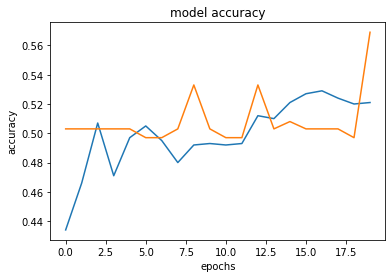

In [47]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")

In [48]:
#save 
model.save("./CHATBOT_MODEL")

2022-11-08 11:25:59.993024: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


<a id="3.3"></a>
## <span style="color:#E77F2A;">Model testing</span>

In [49]:
#evaluation on the test set
model.load_weights("CHATBOT_MODEL")

2022-11-08 11:26:03.832417: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open CHATBOT_MODEL: Failed precondition: CHATBOT_MODEL; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [50]:
pred_results = model.predict(([inputs_test,queries_test]))

In [51]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [52]:
story=' '.join(word for word in train_data[23][0])

In [53]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [54]:
query=' '.join(word for word in train_data[23][1])

In [55]:
query

'Is Sandra in the bedroom ?'

In [56]:
test_data[23][2]

'no'

In [57]:
val_max=np.argmax(pred_results[23])
for key ,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("predicted answer is",k)
print("probability of certainity",pred_results[23][val_max])

predicted answer is no
probability of certainity 0.5408171


In [58]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [59]:
story="mary dropped the football sandra discarded apple in kitchen"
story.split()

['mary',
 'dropped',
 'the',
 'football',
 'sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [60]:
my_question="is apple in the kitchen ?"

In [61]:
my_question.split()

['is', 'apple', 'in', 'the', 'kitchen', '?']

In [62]:
mydata= [(story.split(),my_question.split(),"yes")]

In [63]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [64]:
pred_results= model.predict(([my_story,my_ques]))

In [65]:
val_max=np.argmax(pred_results[0])
for key ,val in tokenizer.word_index.items():
    if val==val_max:
        k=key
print("predicted answer is:",k)
print("probability of certainity",pred_results[0][val_max])

predicted answer is: yes
probability of certainity 0.5072075



### <span style="color:#E77F2A;"> If you find this helpful, I would really appreciate the upvote!</span>

### <span style="color:#E77F2A;">If you see something wrong please let me know.</span>

### <span style="color:#E77F2A;">And lastly Im happy to hear your thoughts about the notebook for me to also improve!</span>